# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

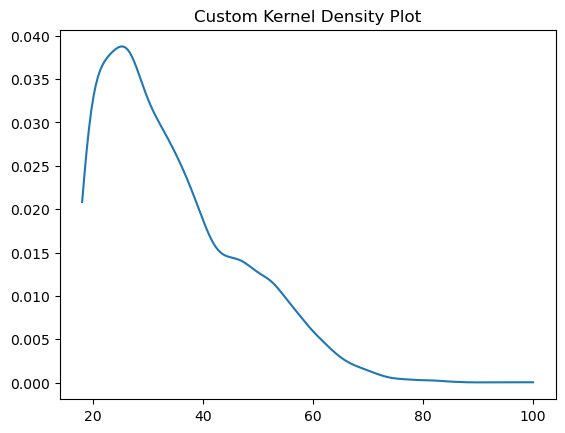

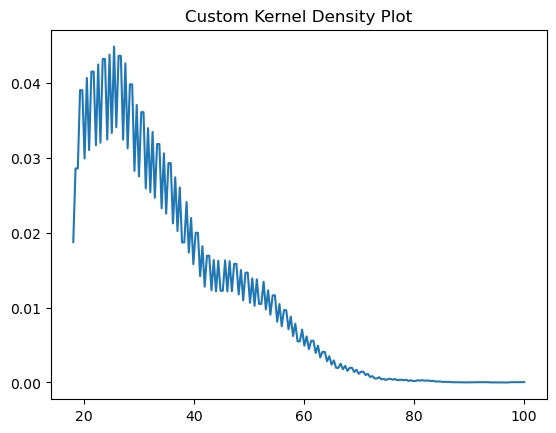

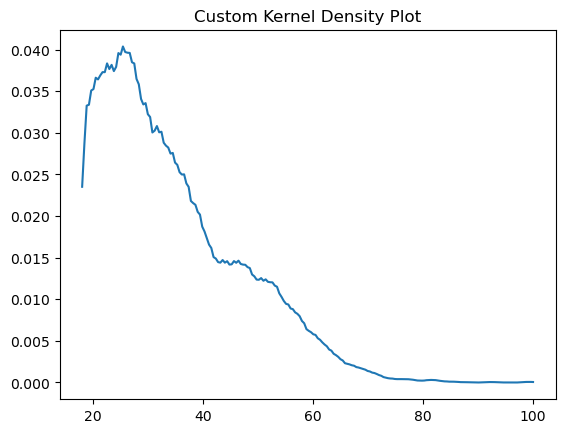

Text(0.5, 1.0, 'Seaborn Kernel Density Plot')

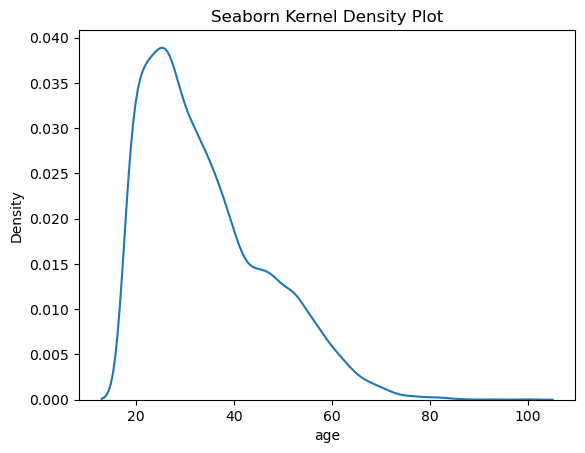

In [ ]:
# Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q1data = pd.read_csv("./data/pretrial_data.csv")

# Function
def kdensity_plot(data, kernel="gaussian", bandwidth=None):
    if isinstance(data, pd.Series):
        data = data.dropna()
    else:
        data = np.asarray(data).flatten()
        data = data[~np.isnan(data)]
        
    data = np.asarray(data).flatten() # added this line to remove the FutureWarning message; asked ChatGPT for an explanation

    n = len(data) # number of samples
    
    # Silverman's Plug-In
    std_dev = np.std(data)
    bandwidth = (1.06) * (std_dev) * (n**(-1/5))
    
    # Defining the different kernels
    def gaussian(z):
        return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)
    
    def uniform(z):
        return 0.5 * (np.abs(z) <= 1)
    
    def epanechnikov(z):
        return 0.75 * (1 - z**2) * (np.abs(z) <= 1)
    
    kernels = {
        "gaussian": gaussian,
        "uniform": uniform,
        "epanechnikov": epanechnikov
    }
    
    select_kernel_function = kernels[kernel] # Selecting the designated kernel
    
    # Make the grid between the min and max
    grid = np.linspace(data.min(), data.max(), 200)
    grid = np.asarray(grid)
    
    # Scale differences by the bandwidth
    z = (grid[:, None] - data[None, :]) / bandwidth
    
    # Apply specific kernel
    kernel_value = select_kernel_function(z)
    density = kernel_value.mean(axis=1) / bandwidth
    
    # Plotting
    plt.figure()
    sns.lineplot(x=grid, y=density)
    plt.title("Custom Kernel Density Plot")
    plt.show()
    
    return grid, density

grid, density = kdensity_plot(q1data["age"], kernel="gaussian")
grid, density = kdensity_plot(q1data["age"], kernel="uniform")
grid, density = kdensity_plot(q1data["age"], kernel="epanechnikov")

# Seaborn Kernel Density Plot
plt.figure()
sns.kdeplot(q1data["age"])
plt.title(f"Seaborn Kernel Density Plot")

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
# Question 2.1
q2data = pd.read_csv("./data/college_completion.csv")

# Question 2.2
print(q2data.shape)
q2data.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Q2.1

Completed in code chunk above

Q2.2

There are 3798 observations of 63 variables in this dataset. Some of the variables that are included are level, aid_value, control, grad_100_value, city, and state.

In [4]:
q2p3_crosstab = pd.crosstab(q2data["control"], q2data["level"])
print(q2p3_crosstab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Q2.3

Based on the crosstab between "control" and "level", there are a few patterns that can be observed. First, we can see that 4-year private not-for-profit schools are the most common in this dataset. Conversely, 2-year private not-for-profit schools are the least common in this dataset. Another pattern we can see if that there tends to be more 4-year schools among private institutions, but there appears to be more 2-year schools among public institutions.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


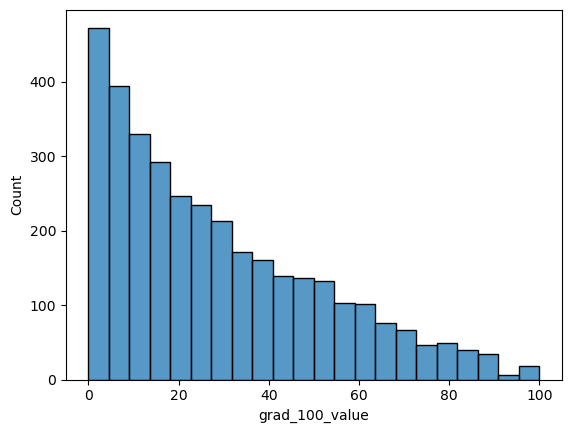

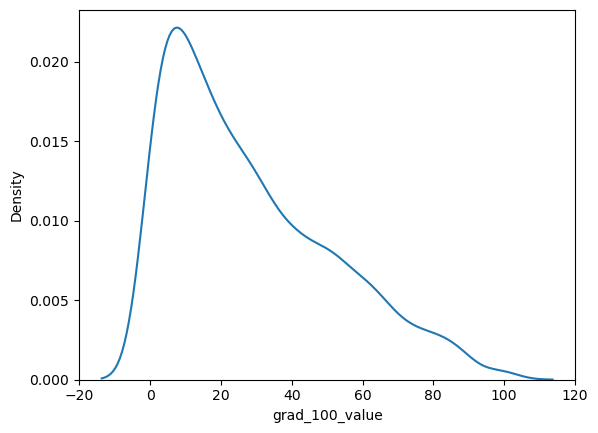

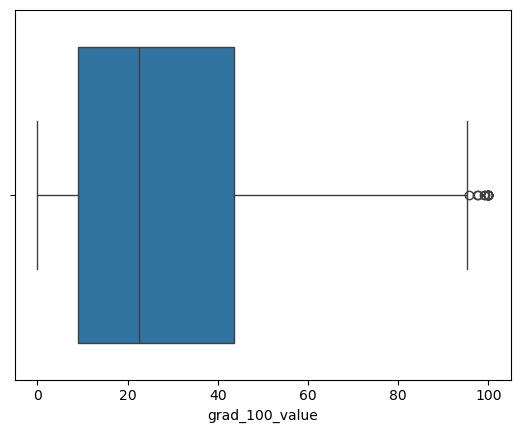

In [5]:
# Question 2.4
## Histogram
plt.figure()
sns.histplot(q2data["grad_100_value"])

## Kernel Density Plot
plt.figure()
sns.kdeplot(q2data["grad_100_value"])

## Boxplot
plt.figure()
sns.boxplot(data=q2data, x="grad_100_value")

## Statistical Description
print(q2data["grad_100_value"].describe())

Q2.4

Completed in the code chunk above

         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


<Axes: xlabel='grad_100_value', ylabel='Density'>

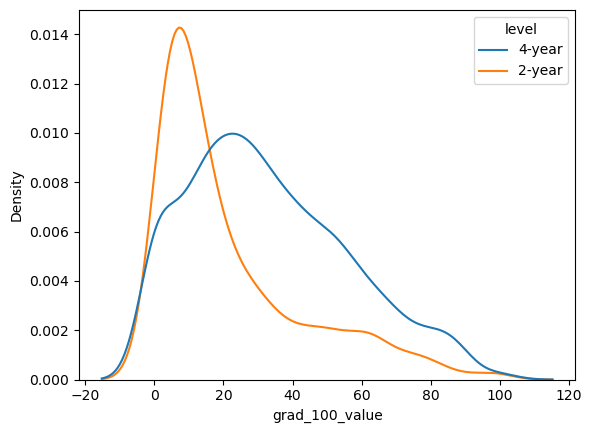

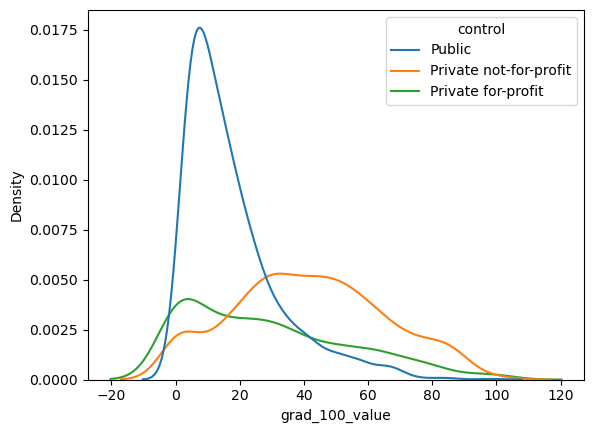

In [8]:
# Question 2.5
group_by_level = q2data.groupby("level")["grad_100_value"].describe()
group_by_control = q2data.groupby("control")["grad_100_value"].describe()
print(group_by_level)
print(group_by_control)

## Grouped Kernel Density Plots
plt.figure()
sns.kdeplot(data=q2data, x="grad_100_value", hue="level")

plt.figure()
sns.kdeplot(data=q2data, x="grad_100_value", hue="control")

Q2.5

Based on the output, the institutions that appear to have the best graduation rates are 4-year instutitions and private not-for-profit institutions. These institution types have the highest graduation rates in their respective groups. Additionally, all types of private institutions have a max graduation rate of 100% and the public institutions have a max graduation rate of 97.8%

<Axes: xlabel='grad_100_value', ylabel='Density'>

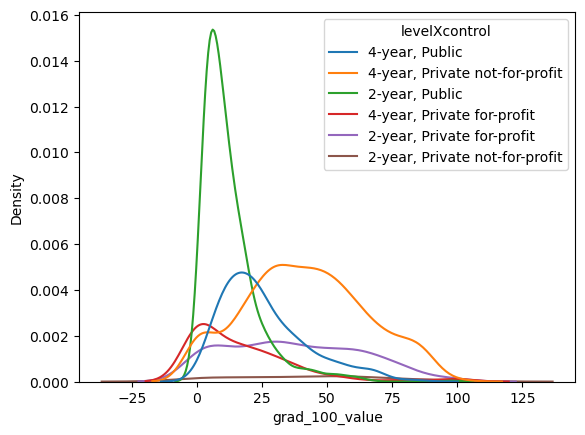

In [9]:
# Question 2.6
q2data["levelXcontrol"] = q2data["level"]+', '+q2data["control"]

plt.figure()
sns.kdeplot(data=q2data, x="grad_100_value", hue="levelXcontrol")

Q2.6

Based on the grouped kernel density plot, the three institution types that appear to have the best graduation rates are 4-year private not-for-profit institutions, 4-year public institutions, and 2-year public institutions. 2-year private not-for-profit institutions might also be one of the institution types that have higher graduation rates.

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

<Axes: xlabel='aid_value', ylabel='Density'>

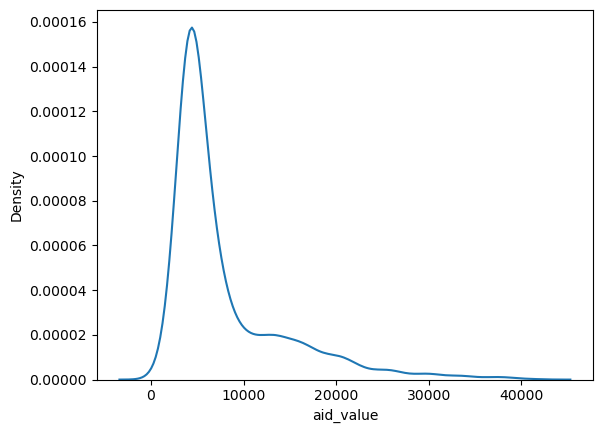

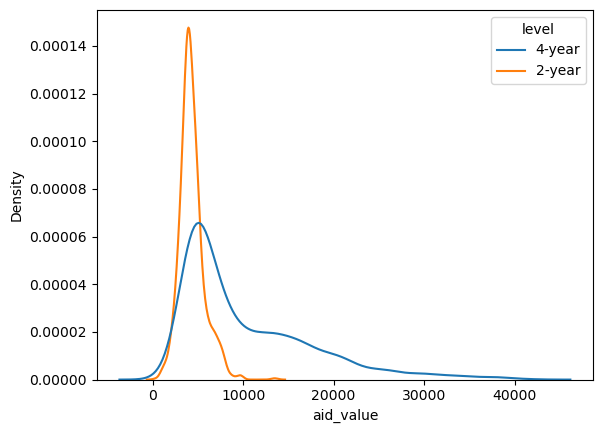

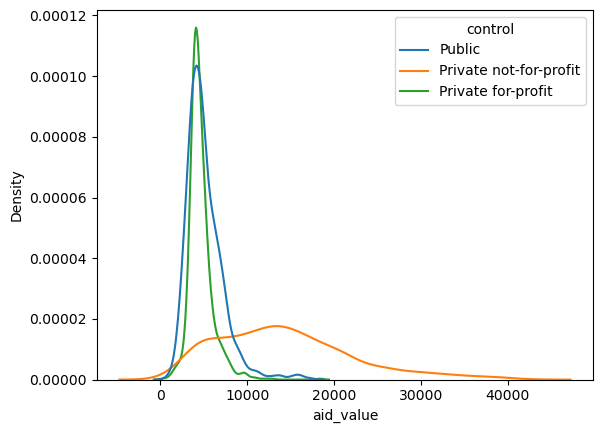

In [11]:
# Question 2.7
q2p7_describe = q2data.groupby(["level","control"])["aid_value"].describe()
print(q2p7_describe)

plt.figure()
sns.kdeplot(data=q2data, x="aid_value")

plt.figure()
sns.kdeplot(data=q2data, x="aid_value", hue="level")

plt.figure()
sns.kdeplot(data=q2data, x="aid_value", hue="control")

Q2.7

When making kernel density plots for "aid_value", "aid_value" grouped by level, and "aid_value" grouped by control, the shape is right skewed for all graphs and groups within each graph.

The statistical description is in the cell output above.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

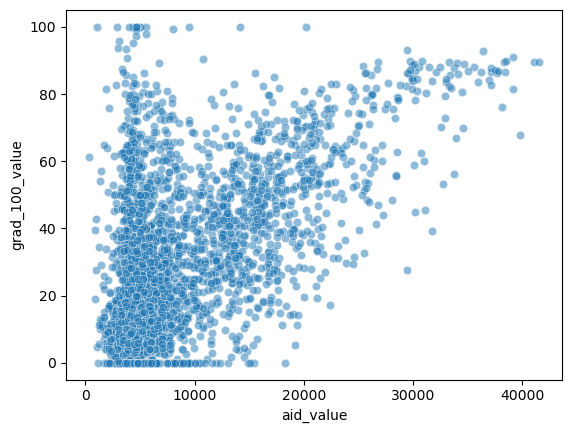

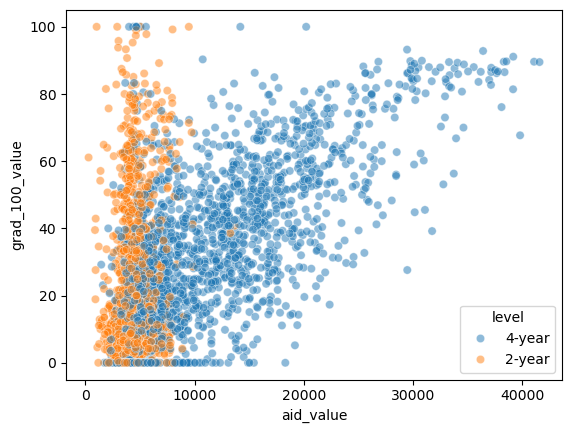

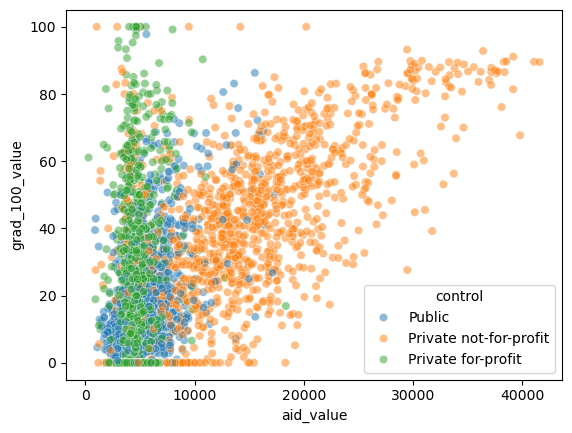

In [18]:
# Question 2.8
## General plot
plt.figure()
sns.scatterplot(data=q2data, x="aid_value", y="grad_100_value", alpha=0.5)

## Grouped by level
plt.figure()
sns.scatterplot(data=q2data, x="aid_value", y="grad_100_value", hue="level", alpha=0.5)

## Grouped by control
plt.figure()
sns.scatterplot(data=q2data, x="aid_value", y="grad_100_value", hue="control", alpha=0.5)

Q2.8

When creating the scatterplot of "grad_100_value" by "aid_value", we can see that there is a generally positive relationship between the two variables. However, there is a lot of variance in the graduation rates when the aid value is 10,000 or less.

When grouping by "level" and "control", we can observe that aid seems to increase/have a positive relationship for 4-year institutions (level) and private not-for-profit institutions (control).